In [16]:
import numpy as np
import matplotlib.pyplot as plt
from lcs import *
import os
import json

In [17]:
fname = "Data/watts-strogatz.json"
# fname = "Data/erdos-renyi.json"

with open(fname) as file:
    data = json.load(file)
p = np.array(data["p"], dtype=float)
ps = np.array(data["ps"], dtype=float)
sps = np.array(data["sps"], dtype=float)

In [18]:
sps[0]

array([[0.15031474, 0.15171566, 0.26361031, 0.15088236, 0.15935559,
        0.15902795, 0.14959282, 0.2998473 , 0.15176513, 0.15089996],
       [0.15015698, 0.19059383, 0.15106649, 0.15102229, 0.1663169 ,
        0.15548364, 0.14943309, 0.16144961, 0.16305115, 0.15079345],
       [0.14999567, 0.15082649, 0.15620159, 0.15068899, 0.15084818,
        0.15789831, 0.14991559, 0.19377233, 0.15348854, 0.15082096],
       [0.14972627, 0.2662044 , 0.1511686 , 0.15090194, 0.15101977,
        0.1590513 , 0.15007863, 0.1523223 , 0.15101446, 0.15082279],
       [0.14979274, 0.15051527, 0.15128635, 0.15084011, 0.15140043,
        0.19559327, 0.1499988 , 0.18191694, 0.15404277, 0.15069492],
       [0.15010627, 0.17179051, 0.15138093, 0.15090608, 0.16791915,
        0.19663336, 0.14964926, 0.20407748, 0.16169596, 0.15087768],
       [0.14948754, 0.15960365, 0.15421524, 0.15094346, 0.15192192,
        0.16801092, 0.14985353, 0.27941086, 0.15132148, 0.15097655],
       [0.14994441, 0.20021898, 0.1545388

Text(0, 0.5, 'PS')

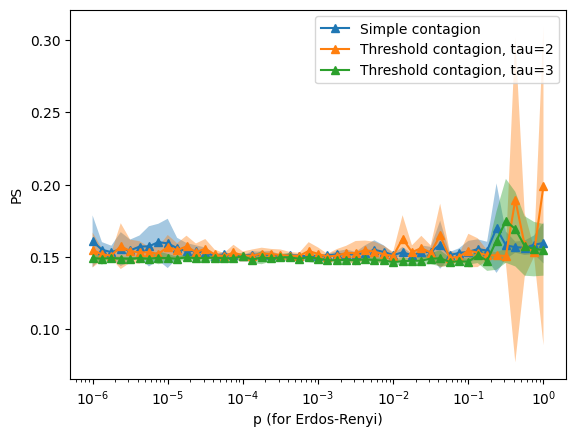

In [20]:
l = ["Simple contagion", "Threshold contagion, tau=2", "Threshold contagion, tau=3"]

for i in range(ps.shape[0]):
    ps_mean = np.mean(ps, axis=2)[i]
    ps_std = np.std(ps, axis=2)[i]
    plt.plot(p, ps_mean, "^-", label=l[i])
    plt.fill_between(p, ps_mean - ps_std, ps_mean + ps_std, alpha=0.4)
plt.legend()
plt.xlabel("p (for Erdos-Renyi)")
plt.ylabel("PS")

Text(0, 0.5, 'PS')

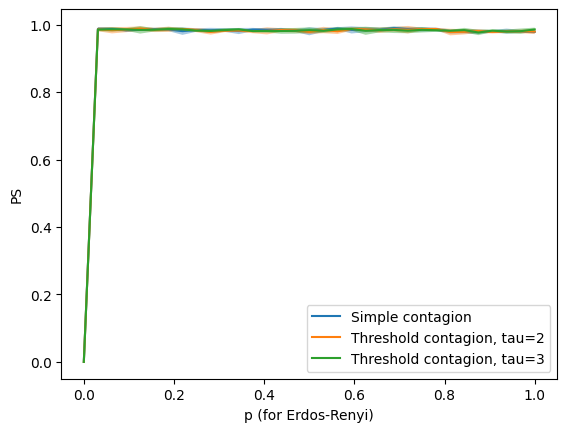

In [16]:
l = ["Simple contagion", "Threshold contagion, tau=2", "Threshold contagion, tau=3"]

for i in range(sps.shape[0]):
    ps_mean = np.mean(sps, axis=2)[i]
    ps_std = np.std(sps, axis=2)[i]
    plt.plot(p, ps_mean, label=l[i])
    plt.fill_between(p, ps_mean - ps_std, ps_mean + ps_std, alpha=0.4)
plt.legend()
plt.xlabel("p (for Erdos-Renyi)")
plt.ylabel("PS")